In [1]:
import numpy as np
import pandas as pd
import torch
# get the image from the dataset
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [2]:
# get the images in images folder, and save them in tensorfor folder in os.listdir('images'):
import os

import cv2
i = 0
# create folder for the tensors if it does not exist
if not os.path.exists('images/tensors'):
    os.makedirs('images/tensors')
for folder in os.listdir('images'):
    if folder == '.DS_Store':
        continue
    for file in os.listdir('images/' + folder):
        if file == '.DS_Store':
            continue
        img = cv2.imread('images/' + folder + '/' + file)
        print(f'image name: {file}')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # resize the image to 120x120
        img = cv2.resize(img, (64, 64))
        # save the image
        cv2.imwrite('images/tensors/' + str(i) + '.jpg', img)
        transform = transforms.Compose([
            transforms.ToTensor()
        ])

        img = transform(img)
        img.requires_grad = True
        print(f'img shape: {img.shape}')
        img = img.unsqueeze(0)
        if i == 0:
            images = img
        else:
            images = torch.cat((images, img), 0)
        i += 1



image name: tang-style.png
img shape: torch.Size([3, 64, 64])
image name: minimalist-gothic.png
img shape: torch.Size([3, 64, 64])
image name: traditional-house.png
img shape: torch.Size([3, 64, 64])
image name: fantasy-unfurnished.png
img shape: torch.Size([3, 64, 64])
image name: wood-elf.png
img shape: torch.Size([3, 64, 64])
image name: troll-hut.png
img shape: torch.Size([3, 64, 64])
image name: spruce-medieval.png
img shape: torch.Size([3, 64, 64])
image name: fantasy-staircase.png
img shape: torch.Size([3, 64, 64])
image name: nordic-unfurnished.png
img shape: torch.Size([3, 64, 64])
image name: priests-rest.png
img shape: torch.Size([3, 64, 64])
image name: fantasy-gatehouse.png
img shape: torch.Size([3, 64, 64])
image name: unfurnished-medieval.png
img shape: torch.Size([3, 64, 64])
image name: medieval-grocery.png
img shape: torch.Size([3, 64, 64])
image name: fantasy-window.png
img shape: torch.Size([3, 64, 64])
image name: medieval-rustic.png
img shape: torch.Size([3, 64, 6

KeyboardInterrupt: 

In [2]:
import numpy as np

def normalize_image(image):
    # Normalize the image to the range [-1, 1]

    normalize = transforms.Compose([
    transforms.ToTensor(),
        # Convert to tensor
])
    normalized_image = normalize(image)
    return normalized_image

def interval_mapping(image, from_min, from_max, to_min, to_max):
    # map values from [from_min, from_max] to [to_min, to_max]
    # image: input array
    from_range = from_max - from_min
    to_range = to_max - to_min
    scaled = np.array((image - from_min) / float(from_range), dtype=float)
    return to_min + (scaled * to_range)

def denormalize_image(normalized_image):
    # Denormalize the image from the range [-1, 1] to [0, 255]
    denormalize = transforms.Compose([
        # Denormalize from [-1, 1] to [0, 255]

        transforms.Normalize(mean=[-1], std=[2]),

])
    normal = denormalize(normalized_image)
    return normal

# take 10 images from the dataset
import random



In [3]:
def train_discriminator(real,fake,optimizer,criterion):
    # train the discriminator
    # real is the real image, fake is the fake image
    # optimizer is the optimizer for the discriminator
    # return the loss of the discriminator
    # freeze the generator
    optimizer.zero_grad()

    real_loss = criterion(discriminator(real), torch.ones(real.shape[0], 1))
    fake_loss = criterion(discriminator(fake), torch.zeros(fake.shape[0], 1))
    loss = real_loss + fake_loss

    loss.backward()
    optimizer.step()

    return loss

In [4]:
def train_generator(optimizer,fake_data,criterion):
    optimizer.zero_grad()
    loss = criterion(discriminator(fake_data), torch.ones(fake_data.shape[0], 1))

    loss.backward()
    optimizer.step()
    return loss


In [18]:
from torch import nn
class Discriminator(nn.Module):
    def __init__(self,channels=3):
        # simple discriminator, input is batch_size * 64x64x3, output is batch_size * 1
        super(Discriminator, self).__init__()
        self.channels = channels
        self.conv1 = nn.Conv2d(self.channels, 16, 4, 2, 1)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.batch_norm1 = nn.BatchNorm2d(16)

        self.conv2 = nn.Conv2d(16, 32, 4, 2, 1)
        self.batch_norm2 = nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(32, 64, 4, 2, 1)
        self.batch_norm3 = nn.BatchNorm2d(64)

        self.conv4 = nn.Conv2d(64, 128, 4, 2, 1)
        self.batch_norm4 = nn.BatchNorm2d(128)



        self.flatten = nn.Flatten()
        self.fully_connected = nn.Linear(128*4*4, 1)

        self.sigmoid = nn.Sigmoid()



    def forward(self, x):
        x = self.conv1(x)
        x = self.leaky_relu(x)
        x = self.batch_norm1(x)
        x = self.conv2(x)
        x = self.leaky_relu(x)
        x = self.batch_norm2(x)
        x = self.conv3(x)
        x = self.leaky_relu(x)
        x = self.batch_norm3(x)
        x = self.conv4(x)
        x = self.leaky_relu(x)
        x = self.batch_norm4(x)

        x = self.flatten(x)
        x = self.fully_connected(x)
        x = self.sigmoid(x)

        return x


In [19]:
# generate random 1,1,64,64 tensor
import torch
random_tensor = torch.rand(1,3,64,64)
print(random_tensor.shape)
discrminator = Discriminator()
output = discrminator(random_tensor)
print(output.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 1])


In [20]:
import torch
import torch.nn as nn
class GaussionNoise(nn.Module):
    def __init__(self, batch_size, input_shape, std=0.05):
        super(GaussionNoise, self).__init__()
        self.shape = (batch_size,) + input_shape
        self.noise = torch.zeros(self.shape).cuda()
        self.std = std

    def forward(self, x):
        self.noise.data.normal_(0, std=self.std)
        return x + self.noise
class Generator(nn.Module):
    def __init__(self, z_dim=100, channels=3, img_size=64):
        super(Generator, self).__init__()
        self.z_dim = z_dim
        self.channels = channels
        self.img_size = img_size
        self.relu = nn.ReLU()
        self.linear = nn.Linear(self.z_dim, 128 * (self.img_size // 16) ** 2)
        self.deconv1 = nn.ConvTranspose2d(128, 64, 4, 2, 1)
        self.batch_norm1 = nn.BatchNorm2d(64)

        self.deconv2 = nn.ConvTranspose2d(64, 32, 4, 2, 1)
        self.batch_norm2 = nn.BatchNorm2d(32)

        self.deconv3 = nn.ConvTranspose2d(32, 16, 4, 2, 1)
        self.batch_norm3 = nn.BatchNorm2d(16)

        self.deconv4 = nn.ConvTranspose2d(4, 3,1)  # Increase output channels

        self.pixel_shuffle = nn.PixelShuffle(2)  # Rearrange channels with a factor of 2
        self.tanh = nn.Tanh()

    def forward(self, z):
        x = self.linear(z)
        x = x.view(x.size(0), 128, (self.img_size // 16), (self.img_size // 16))
        x = self.deconv1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.deconv2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.deconv3(x)
        x = self.batch_norm3(x)
        x = self.relu(x)
        x = self.pixel_shuffle(x)  # Apply pixel shuffle to increase spatial resolution
        x = self.deconv4(x)
        x = self.tanh(x)
        return x

dummy_input = torch.randn(64, 100)
model = Generator()
print(f"output shape of the generator is {model(dummy_input).shape}")


output shape of the generator is torch.Size([64, 3, 64, 64])


In [21]:
from torch.utils.tensorboard import SummaryWriter
# create folder iamges/taining if not exist
import os
if not os.path.exists('images/augmented'):
    os.makedirs('images/augmented')
writer = SummaryWriter('runs/GAN')
epochs = 200
lr = 0.0002
z_dim = 256
channels = 3
beta1 = 0.5
img_size = 64
"""device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')"""
device = torch.device('cpu')



generator = Generator(z_dim, channels, img_size).to(device)
discriminator = Discriminator(channels).to(device)
criterion = nn.BCELoss()
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

In [22]:
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = os.listdir(root_dir)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        return image

# Define data transformation (e.g., resize and normalize)
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Create an instance of the custom dataset
custom_dataset = CustomDataset(root_dir='images/augmented', transform=transform)

# Create a data loader
batch_size = 16
data_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)
# print the shape of the data
data_loader.dataset[0].shape



torch.Size([3, 64, 64])

tensor([[[0.5137, 0.5137, 0.5137,  ..., 0.5216, 0.5255, 0.5255],
         [0.5176, 0.5176, 0.5176,  ..., 0.5216, 0.5216, 0.5216],
         [0.5216, 0.5216, 0.5216,  ..., 0.5255, 0.5255, 0.5255],
         ...,
         [0.3059, 0.3137, 0.3098,  ..., 0.3098, 0.3098, 0.3098],
         [0.3059, 0.3137, 0.3098,  ..., 0.3098, 0.3098, 0.3098],
         [0.3059, 0.3137, 0.3098,  ..., 0.3098, 0.3098, 0.3098]],

        [[0.6824, 0.6824, 0.6824,  ..., 0.6863, 0.6863, 0.6863],
         [0.6824, 0.6824, 0.6824,  ..., 0.6863, 0.6863, 0.6863],
         [0.6824, 0.6824, 0.6824,  ..., 0.6824, 0.6824, 0.6824],
         ...,
         [0.4078, 0.4118, 0.4118,  ..., 0.4078, 0.4078, 0.4078],
         [0.4078, 0.4118, 0.4118,  ..., 0.4078, 0.4078, 0.4078],
         [0.4039, 0.4118, 0.4118,  ..., 0.4078, 0.4078, 0.4078]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 0.

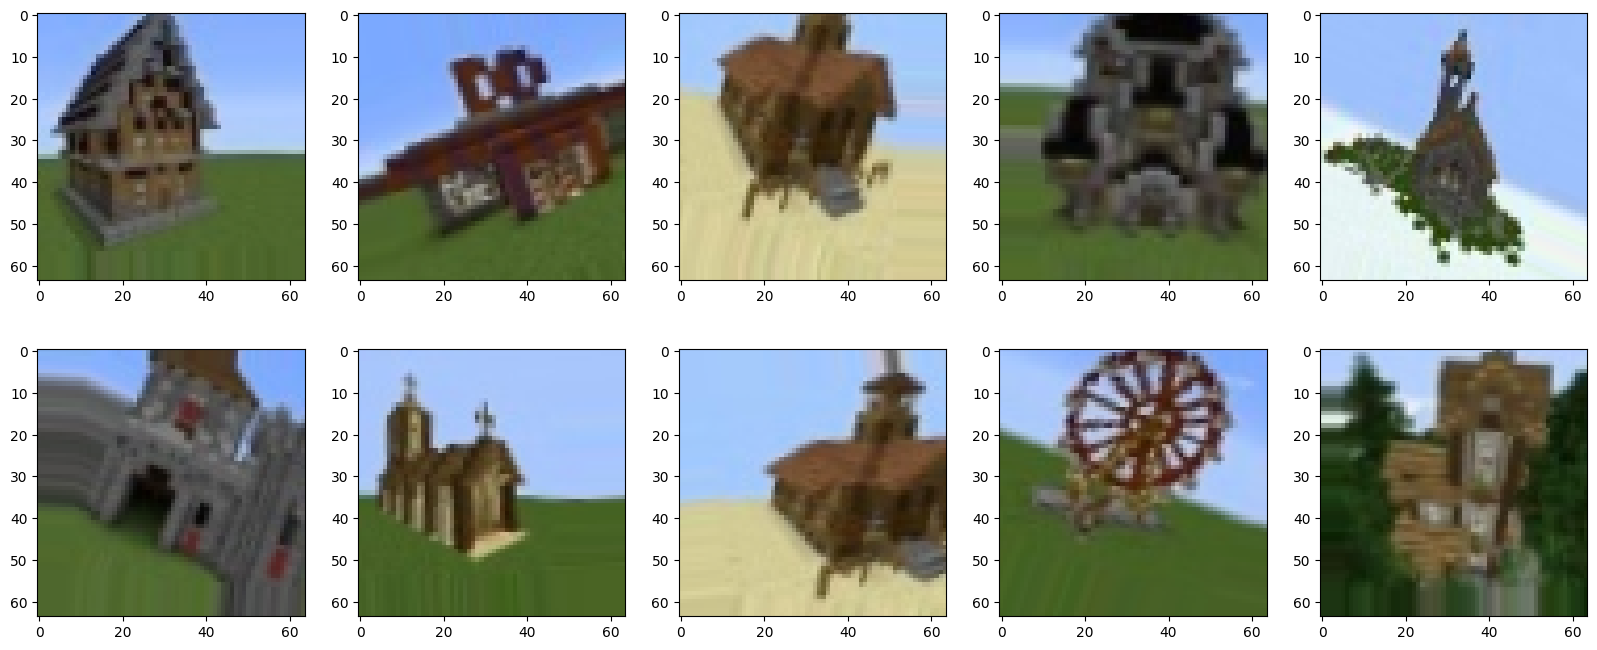

In [23]:
# take 10 images from the dataset
random_images = []
def rescale_image(image):
    image = 0.5 * (image + 1)
    return image
# plot the images
for i in range(10):
    # de normalize the image
    #img = denormalize_image(data_loader.dataset[i])
    random_number = np.random.randint(0, len(data_loader.dataset))

    img = data_loader.dataset[random_number]
    img =  rescale_image(img)

    random_images.append(img)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 8))
for i in range(len(random_images)):
    ax = fig.add_subplot(2, 5, i + 1)
    print(random_images[i])
    ax.imshow(random_images[i].permute(1, 2, 0))

In [ ]:
import torchvision.utils as vutils
from torchvision.utils import save_image
import numpy as np
noise_value_const = - 4 / epochs
n_critics = 5
# create directory if not exist
if not os.path.exists('images/training'):
    os.makedirs('images/training')
previous_D_loss = 10000
previous_G_loss = 0
for epoch in range(epochs):
    print(f'epoch: {epoch}')
    noise_value_input  = np.exp(noise_value_const * epoch) * 0.1
    for i, data in enumerate(data_loader):
        real = data.to(device)
        # add a gos
        noise = torch.randn(batch_size, z_dim).to(device)
        fake = generator(noise)
        loss_D = train_discriminator(real, fake, optimizer_D, criterion)
        # clip discriminator weights
        for p in discriminator.parameters():
            p.data.clamp_(-0.01, 0.01)

        if i % n_critics == 0:
            # reset the gradients back to zero
            optimizer_G.zero_grad()
            noise = torch.randn(batch_size, z_dim).to(device)
            fake = generator(noise)
            loss_G = train_generator(optimizer_G, fake, criterion)
        # log loss values to TensorBoard
        writer.add_scalar('loss_D', loss_D, epoch * len(data_loader) + i + 1)
        writer.add_scalar('loss_G', loss_G, epoch * len(data_loader) + i + 1)
        # log generated images to TensorBoard
        if i % 50 == 0:
            print(f"adding images to tensorboard")

            fake_to_save = rescale_image(fake.cpu().detach())
            print(f'max: {fake.max()}, min: {fake.min()}')
            print(f'max: {real.max()}, min: {real.min()}')
            img_grid_real = vutils.make_grid(real[:32], normalize=True)
            img_grid_fake = vutils.make_grid(fake_to_save[:32], normalize=True)
            # check max and min values of the pixels
            print(f'max: {img_grid_real.max()}, min: {img_grid_real.min()}')
            print(f'max: {img_grid_fake.max()}, min: {img_grid_fake.min()}')

            writer.add_image('real_images', img_grid_real, epoch * len(data_loader) + i + 1)
            writer.add_image('fake_images', img_grid_fake, epoch * len(data_loader) + i + 1)
        if i % 50 == 0:
            print('Epoch: %d, Batch: %d, loss_D: %.3f, loss_G: %.3f' % (epoch, i, loss_D, loss_G))
            fake = denormalize_image(fake)

            save_image(fake, f'images/training/fake_images-{epoch * len(data_loader) + i + 1}.png')

epoch: 0
adding images to tensorboard
max: 0.9342085123062134, min: -0.9992324113845825
max: 1.0, min: -1.0
max: 1.0, min: 0.0
max: 1.0, min: 0.0
Epoch: 0, Batch: 0, loss_D: 1.583, loss_G: 0.698
adding images to tensorboard
max: 0.9132029414176941, min: -0.9979426264762878
max: 1.0, min: -1.0
max: 1.0, min: 0.0
max: 1.0, min: 0.0
Epoch: 0, Batch: 50, loss_D: 1.385, loss_G: 0.694
adding images to tensorboard
max: 0.9117661118507385, min: -0.9989363551139832
max: 1.0, min: -1.0
max: 1.0, min: 0.0
max: 1.0, min: 0.0
Epoch: 0, Batch: 100, loss_D: 1.383, loss_G: 0.695
adding images to tensorboard
max: 0.9259033203125, min: -0.9950224757194519
max: 1.0, min: -1.0
max: 1.0, min: 0.0
max: 1.0, min: 0.0
Epoch: 0, Batch: 150, loss_D: 1.370, loss_G: 0.704
adding images to tensorboard
max: 0.9384196400642395, min: -0.9976219534873962
max: 1.0, min: -1.0
max: 1.0, min: 0.0
max: 1.0, min: 0.0
Epoch: 0, Batch: 200, loss_D: 1.345, loss_G: 0.716
adding images to tensorboard
max: 0.8899027109146118, min

In [ ]:
# perform data augmentation to increase the size of the dataset
from keras.preprocessing.image import ImageDataGenerator
import os
from tqdm import tqdm

# Create an instance of the ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load your 500 images and iterate through them
# Apply augmentations and save the augmented images to a new directory
input_dir = 'images/tensors'
output_dir = 'images/augmented'
# Create output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, data in enumerate(data_loader):
    real = data.to(device)

    # iterate through the images in the batch and apply augmentation
    for j in tqdm(range(real.shape[0])):
        # Reshape to array of 1 sample
        x = real[j, :, :, :].detach().cpu().numpy()
        #x = normalize_image(x)
        """x = x.view(64,64,3)"""
        x= x.transpose(1,2,0)
        x = x.reshape((1,) + x.shape)
        print(x.shape)
        # Generate 10 augmented images using the above datagen
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug2', save_format='png'):
            i += 1
            if i > 150:
                break  # otherwise the generator would loop indefinitely


In [ ]:
# count the nymer of images in the augmented dataset
import os
for root, dirs, files in os.walk('images/augmented'):
    print(len(files))

In [ ]:
# try with VAE
print(real.shape)

In [ ]:
class SamplingLayer(torch.nn.Module):
    def __init__(self):
        super(SamplingLayer, self).__init__()

    def forward(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

class VariationalEncoder(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VariationalEncoder, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 8, kernel_size=3, stride=2, padding=1)
        self.bn1 = torch.nn.BatchNorm2d(8)  # Batch Normalization after the first convolution
        self.conv2 = torch.nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1)
        self.bn2 = torch.nn.BatchNorm2d(16)  # Batch Normalization after the second convolution
        self.conv3 = torch.nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        self.bn3 = torch.nn.BatchNorm2d(32)  # Batch Normalization after the third convolution

        self.fc1 = torch.nn.Linear(2048, hidden_dim)
        self.mu = torch.nn.Linear(hidden_dim, latent_dim)
        self.logvar = torch.nn.Linear(hidden_dim, latent_dim)
        self.sampling = SamplingLayer()
        # init logvar to 0
        self.logvar.weight.data.fill_(0)
        self.logvar.bias.data.fill_(0)

    def forward(self, x):
        original_x = x
        x = self.conv1(x)
        x = self.bn1(x)  # Apply Batch Normalization
        x = torch.nn.functional.leaky_relu(x, 0.2)
        x = self.conv2(x)
        x = self.bn2(x)  # Apply Batch Normalization
        x = torch.nn.functional.leaky_relu(x, 0.2)
        x = self.conv3(x)
        x = self.bn3(x)  # Apply Batch Normalization
        x = torch.nn.functional.leaky_relu(x, 0.2)

        x = torch.nn.Flatten(start_dim=1)(x)
        # x: batch_size * 64*7*7
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        # x: batch_size * hidden_dim
        mu = self.mu(x)
        sigma = self.logvar(x)
        z = self.sampling(mu, sigma)
        # print the shape
        """print(f'original_x: {original_x.shape}')
        print(f'mu: {mu.shape}')
        print(f'sigma: {sigma.shape}')
        print(f'z: {z.shape}')"""

        # x: batch_size * latent_dim
        return z, mu, sigma, original_x

class VariationalDecoder(torch.nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(VariationalDecoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.fc1 = torch.nn.Linear(latent_dim, hidden_dim)
        self.fc2 = torch.nn.Linear(hidden_dim, 3 * 3 * 64)

        # Transpose Convolutional layers
        self.t_conv1 = torch.nn.ConvTranspose2d(64, 32, kernel_size=7, stride=2, padding=0)
        self.bn1 = torch.nn.BatchNorm2d(32)  # Batch Normalization after the first transposed convolution
        self.t_conv2 = torch.nn.ConvTranspose2d(32, 16, kernel_size=7, stride=2, padding=0)
        self.bn2 = torch.nn.BatchNorm2d(16)  # Batch Normalization after the second transposed convolution
        self.t_conv3 = torch.nn.ConvTranspose2d(16, 8, kernel_size=7, stride=2, padding=0)
        self.bn3 = torch.nn.BatchNorm2d(8)  # Batch Normalization after the third transposed convolution
        self.t_conv4 = torch.nn.ConvTranspose2d(8, 3, kernel_size=8, stride=1, padding=1)



    def forward(self, x):
        batch_size = x.size(0)
        x = self.fc1(x)
        x = torch.nn.functional.leaky_relu(x, 0.2)
        x = self.fc2(x)
        x = torch.nn.functional.leaky_relu(x, 0.2)
        x = torch.nn.Unflatten(1, (64, 3, 3))(x)
        x = self.t_conv1(x)
        x = self.bn1(x)  # Apply Batch Normalization
        x = torch.nn.functional.leaky_relu(x, 0.2)
        x = self.t_conv2(x)
        x = self.bn2(x)  # Apply Batch Normalization
        x = torch.nn.functional.leaky_relu(x, 0.2)
        x = self.t_conv3(x)
        x = self.bn3(x)  # Apply Batch Normalization
        x = torch.nn.functional.leaky_relu(x, 0.2)
        x = self.t_conv4(x)

        x = torch.nn.functional.tanh(x)

        return x



In [ ]:
class VariationalAutoEncoder(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VariationalAutoEncoder, self).__init__()
        self.encoder = VariationalEncoder(input_dim, hidden_dim, latent_dim)
        self.decoder = VariationalDecoder(latent_dim, hidden_dim, input_dim)

    def forward(self, x):
        z, mu, sigma, original_x = self.encoder(x)
        x = self.decoder(z)
        return x, mu, sigma, original_x
import torch
def KL_loss(mu, sigma):
    return -0.5 * torch.sum(1 + sigma - mu.pow(2) - sigma.exp())

def reconstruction_loss(original_x, x):

    # its a color image with 3 channels, values between -1 and 1
    # mae loss

    return torch.nn.functional.l1_loss(original_x, x)

def loss_function(x, original_x, mu, sigma,k1=1,k2=0):

    return k1 *reconstruction_loss(original_x, x) + k2 * KL_loss(mu, sigma)

In [ ]:
# generate random 1,3,64,64 size
random_input = torch.randn(1, 3, 64, 64)
VAE = VariationalAutoEncoder(3, 256, 256)
encoded,_,_,_ = VAE.encoder(random_input)
decoded = VAE.decoder(encoded)


In [66]:
#keep only a percentage of the data
percentage = 0.1
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = os.listdir(root_dir)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        return image

# Define data transformation (e.g., resize and normalize)
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Adjust mean and std as needed
])

# Create an instance of the custom dataset
custom_dataset = CustomDataset(root_dir='images/augmented', transform=transform)
# cut the dataset
custom_dataset.image_files = custom_dataset.image_files[:int(len(custom_dataset.image_files)*percentage)]
# Create a data loader
batch_size = 128
data_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

VAE_optimizer = torch.optim.Adam(VAE.parameters(), lr=0.01)



In [67]:
def train_VAE(epoch):
    VAE.train()
    for epoch in range(epoch):
        train_loss = 0

        for batch_idx, data in enumerate(data_loader):
            data = data.to(device)
            data = data.float()
            VAE_optimizer.zero_grad()
            x, mu, sigma, original_x = VAE(data)
            original_x = original_x.detach()
            loss = loss_function(x, original_x, mu, sigma)
            loss.backward()
            train_loss += loss.mean().item()
            VAE_optimizer.step()

        print('====> Epoch: {} Average loss: {:.4f}'.format(
            epoch, train_loss / len(data_loader.dataset)))

In [68]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_VAE(10000)

====> Epoch: 0 Average loss: nan


KeyboardInterrupt: 

torch.Size([1, 3, 64, 64])


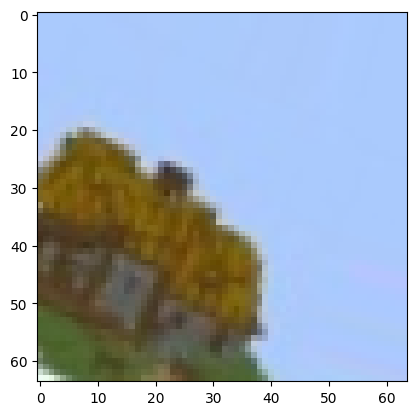

In [46]:
# encode a random image
random_image_from_dataset = custom_dataset[np.random.randint(0, len(custom_dataset))]
random_image_from_dataset = random_image_from_dataset.unsqueeze(0)
# plot the image

random_image_from_dataset = denormalize_image(random_image_from_dataset)
print(random_image_from_dataset.shape)# check max and min values of the pixels
plt.imshow(random_image_from_dataset[0].permute(1, 2, 0) )
plt.show()

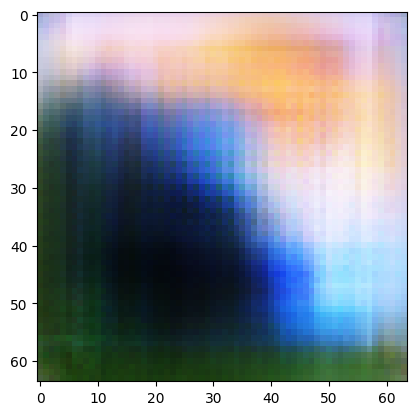

In [47]:
encoded,_,_,_ = VAE.encoder(random_image_from_dataset.to(device))
decoded = VAE.decoder(encoded)
# plot the decoded image
decoded = denormalize_image(decoded)
plt.imshow(decoded[0].permute(1, 2, 0).detach().cpu().numpy())
plt.show()